# Salary Dataset - Simple linear regression


# INTRODUCTION

In this project we will be working with the Salary Dataset from Kaggle
which is designed for applying Simple Linear Regression. 


The primary goal is to understand the relationship between experience and salary
allowing us to predict the expected salary for an individual based on their years of experience.


Simple Linear Regression is one of the most fundamental and important statistical methods in
machine learning. It involves finding a linear relationship between two variables: an independent variable and a dependent variable.

In this case experience is the independent variable, and salary is the dependent variable.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


Insight: The salary distribution shows that most salaries fall between $37,732 and $122,392, with a median of $65,238. The significant spread indicates that employees with more experience may earn substantially more, which aligns with the expectation in many job markets.

In [6]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# Exploratory Data Analysis (EDA)

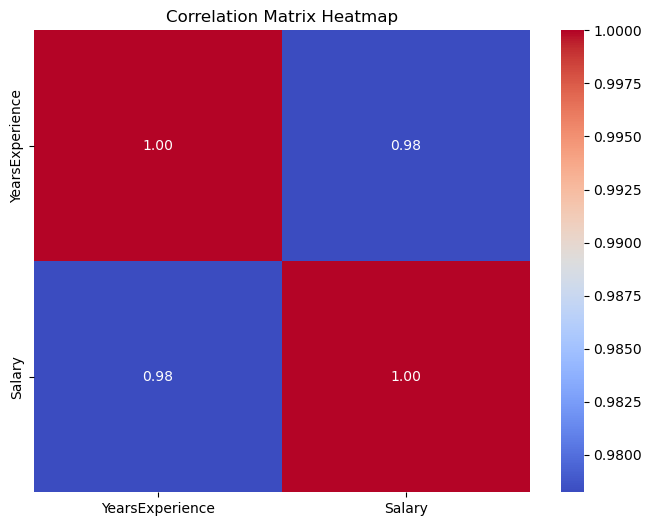

In [8]:
#Correlation Matrix and Heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

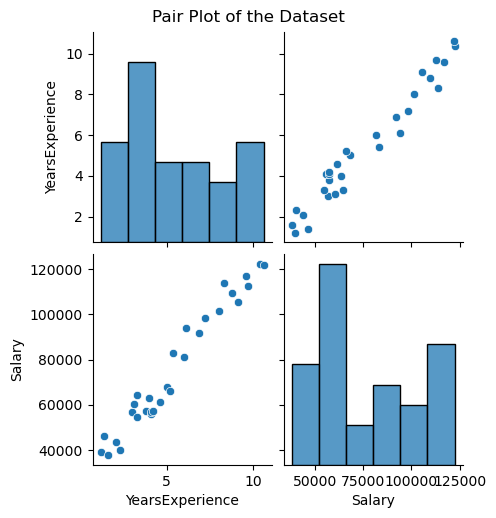

In [9]:
#Pair Plot
sns.pairplot(df)
plt.suptitle('Pair Plot of the Dataset', y=1.02)
plt.show()

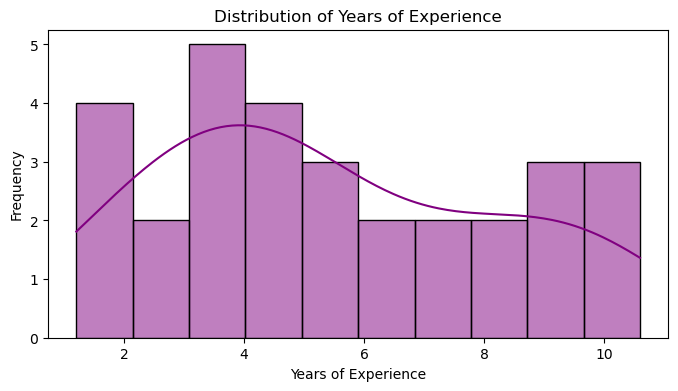

In [10]:
# Distribution of Years Experience
plt.figure(figsize=(8, 4))
sns.histplot(df['YearsExperience'], kde=True, bins=10 , color='purple')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

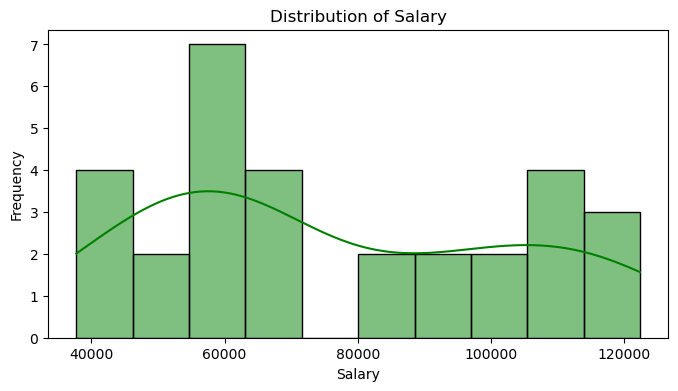

In [11]:
# Distribution of Salary
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary'], kde=True, bins=10, color='green')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

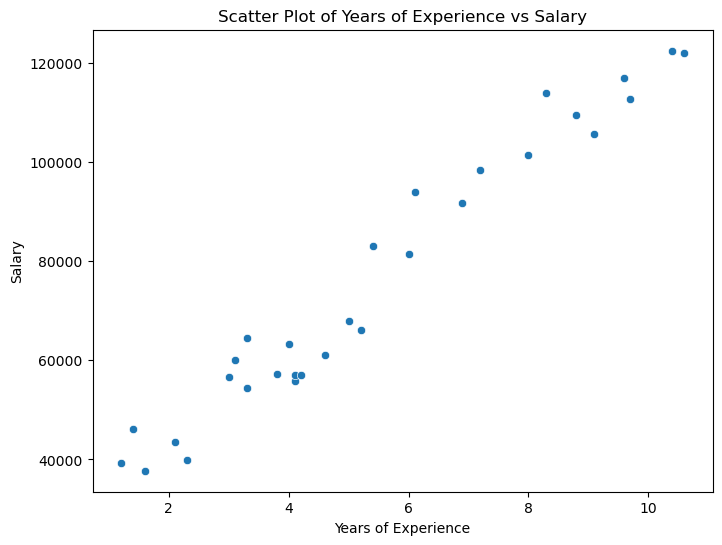

In [12]:
#visualize the relationship between YearsExperience and Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Scatter Plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

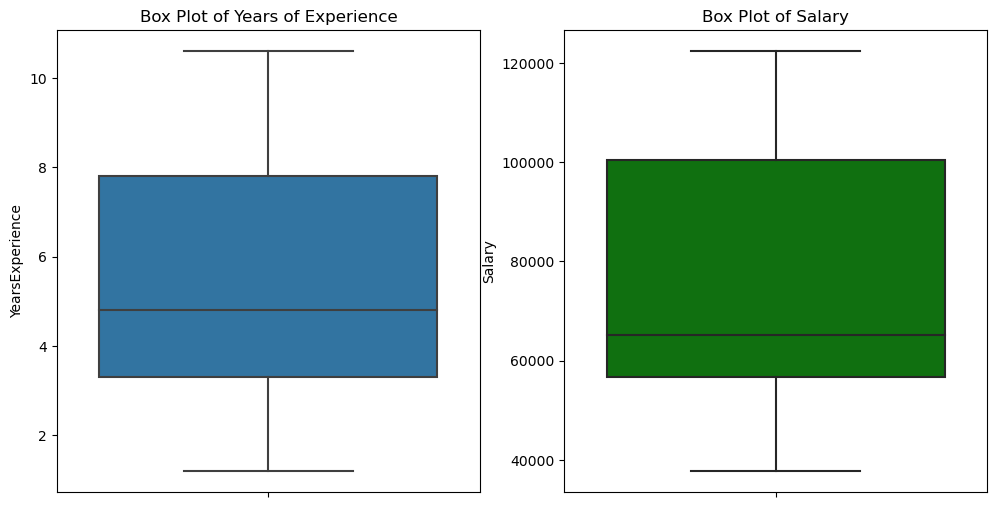

In [13]:
# Box plot for detecting outliers in YearsExperience and Salary
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['YearsExperience'])
plt.title('Box Plot of Years of Experience')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary'], color='green')
plt.title('Box Plot of Salary')

plt.show()

In [14]:
# Calculate the Pearson correlation coefficient between YearsExperience and Salary
correlation = df['YearsExperience'].corr(df['Salary'])
print(f'Pearson Correlation Coefficient between Years of Experience and Salary: {correlation:.2f}')

Pearson Correlation Coefficient between Years of Experience and Salary: 0.98


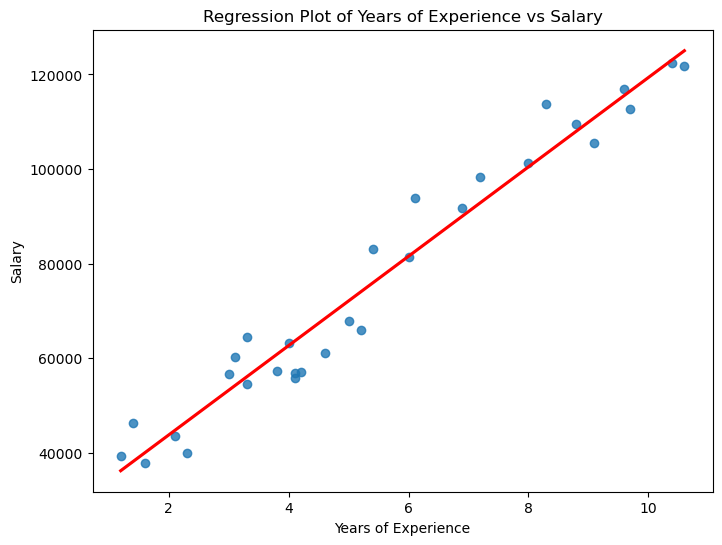

In [15]:
# Regression plot to visualize the linear relationship between YearsExperience and Salary
plt.figure(figsize=(8, 6))
sns.regplot(x='YearsExperience', y='Salary', data=df, ci=None, line_kws={"color": "red"})
plt.title('Regression Plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
X = df[['YearsExperience']]  # Features
y = df['Salary']             # Target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Model Selection and Training

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)

# Model Evaluation

In [21]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 42510267.47


In [22]:
# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.93


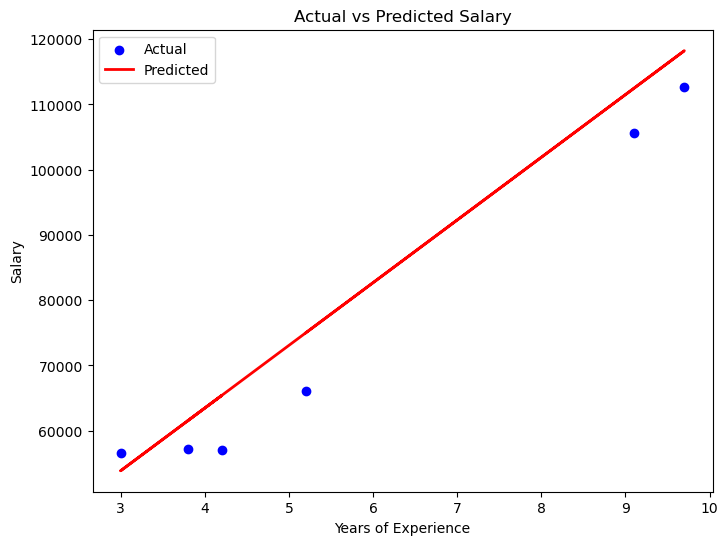

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


# Summary

The linear regression model performs exceptionally well
with a high R² value reflecting its strong predictive capability. 
Although the MSE is substantial, it is consistent with the data’s scale
indicating that the model's predictions are fairly accurate.